In [67]:
!pip install opencv-python


[notice] A new release of pip available: 22.2.2 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [69]:
img = cv2.imread('D:\College\Project\sports\dataset\messi\download (1).jpg')
img.shape

(225, 225, 3)

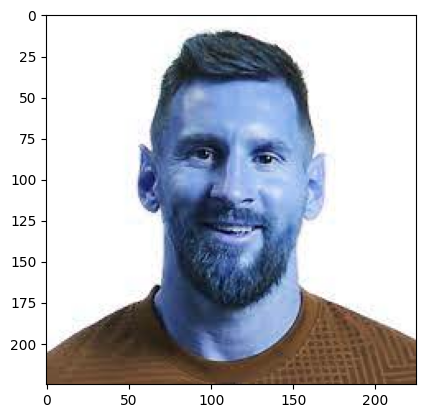

In [70]:
plt.imshow(img)

In [71]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(225, 225)

In [72]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [ 76,  76,  76, ...,  83,  83,  79],
       [ 75,  75,  75, ...,  67,  67,  63],
       [ 74,  75,  75, ...,  64,  64,  66]], dtype=uint8)

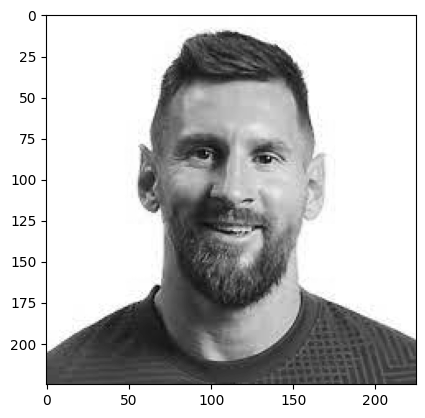

In [73]:

plt.imshow(gray, cmap='gray')

In [74]:
face_cascade = cv2.CascadeClassifier('D:\College\Project\sports\opencv\haarcascades\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('D:\College\Project\sports\opencv\haarcascades\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 55,  40, 117, 117]])

In [75]:
(x,y,w,h) = faces[0]
x,y,w,h

(55, 40, 117, 117)

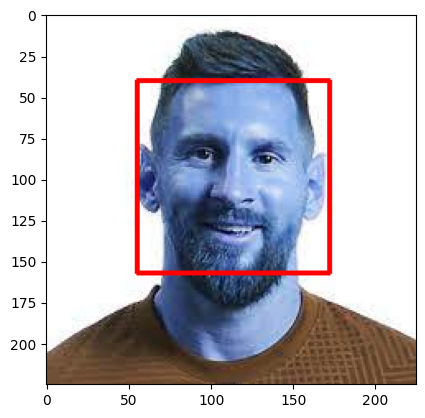

In [76]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

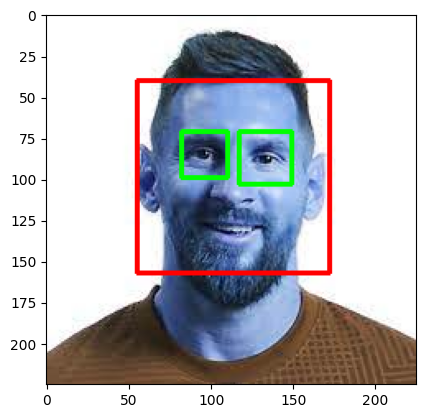

In [77]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

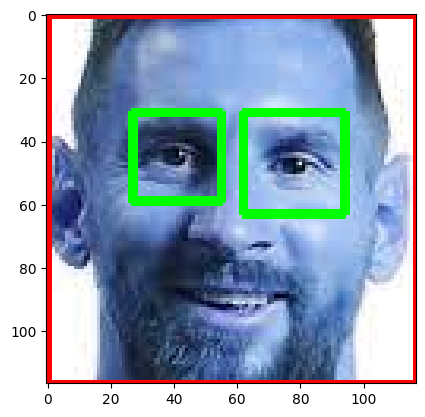

In [78]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [79]:
cropped_img = np.array(roi_color)
cropped_img.shape

(117, 117, 3)

In [80]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

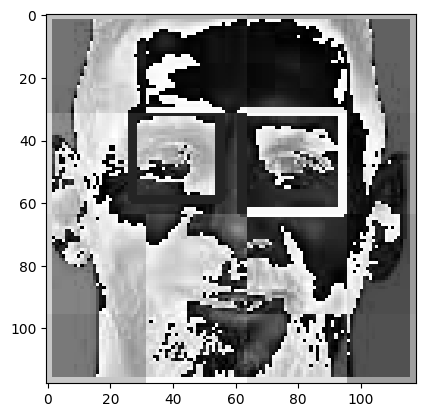

In [81]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [82]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

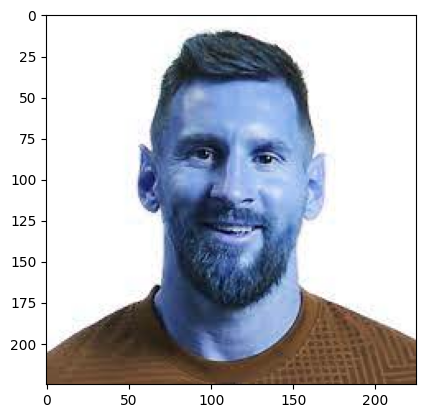

In [83]:
original_image = cv2.imread('D:\College\Project\sports\dataset\messi\download (1).jpg')
plt.imshow(original_image)

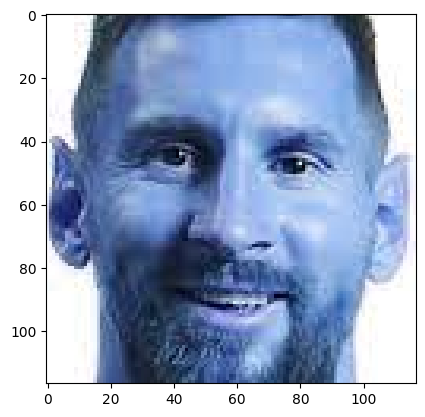

In [84]:
cropped_image = get_cropped_image_if_2_eyes('D:\College\Project\sports\dataset\messi\download (1).jpg')
plt.imshow(cropped_image)

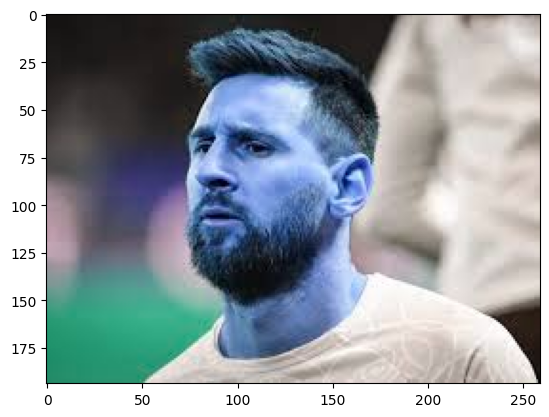

In [85]:
org_image_obstructed = cv2.imread('D:\College\Project\sports\dataset\messi\images (57).jpg')
plt.imshow(org_image_obstructed)

In [86]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('D:\College\Project\sports\dataset\messi\images (57).jpg')
cropped_image_no_2_eyes

array([[[ 33,  28,  27],
        [ 33,  28,  27],
        [ 33,  28,  27],
        ...,
        [171, 206, 240],
        [140, 172, 208],
        [130, 159, 196]],

       [[ 33,  28,  27],
        [ 33,  28,  27],
        [ 33,  28,  27],
        ...,
        [185, 214, 245],
        [182, 211, 242],
        [172, 200, 231]],

       [[ 34,  29,  28],
        [ 33,  28,  27],
        [ 33,  28,  27],
        ...,
        [188, 215, 242],
        [185, 212, 239],
        [177, 201, 229]],

       ...,

       [[150, 130, 153],
        [154, 132, 156],
        [158, 136, 160],
        ...,
        [ 45,  64, 107],
        [ 37,  56, 101],
        [ 61,  78, 121]],

       [[152, 131, 153],
        [158, 135, 157],
        [161, 138, 160],
        ...,
        [ 49,  68, 106],
        [ 25,  44,  82],
        [ 56,  73, 112]],

       [[156, 133, 155],
        [159, 136, 158],
        [165, 139, 162],
        ...,
        [ 51,  67, 103],
        [ 29,  45,  81],
        [ 41,  55,  91]]

In [87]:
path_to_data = "D:\College\Project\sports\dataset"
path_to_cr_data = "D:\College\Project\sports\dataset\cropped"

In [88]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [89]:
img_dirs

['D:\\College\\Project\\sports\\dataset\\benzema',
 'D:\\College\\Project\\sports\\dataset\\halland',
 'D:\\College\\Project\\sports\\dataset\\kross',
 'D:\\College\\Project\\sports\\dataset\\mbappe',
 'D:\\College\\Project\\sports\\dataset\\messi',
 'D:\\College\\Project\\sports\\dataset\\modric',
 'D:\\College\\Project\\sports\\dataset\\neymar',
 'D:\\College\\Project\\sports\\dataset\\ronaldo',
 'D:\\College\\Project\\sports\\dataset\\salah',
 'D:\\College\\Project\\sports\\dataset\\zlatan']

In [90]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [91]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  D:\College\Project\sports\dataset\croppedbenzema
Generating cropped images in folder:  D:\College\Project\sports\dataset\croppedhalland
Generating cropped images in folder:  D:\College\Project\sports\dataset\croppedkross
Generating cropped images in folder:  D:\College\Project\sports\dataset\croppedmbappe
Generating cropped images in folder:  D:\College\Project\sports\dataset\croppedmessi
Generating cropped images in folder:  D:\College\Project\sports\dataset\croppedmodric
Generating cropped images in folder:  D:\College\Project\sports\dataset\croppedneymar
Generating cropped images in folder:  D:\College\Project\sports\dataset\croppedronaldo
Generating cropped images in folder:  D:\College\Project\sports\dataset\croppedsalah
Generating cropped images in folder:  D:\College\Project\sports\dataset\croppedzlatan


In [92]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'D:\\College\\Project\\sports\\dataset\\croppedbenzema': ['D:\\College\\Project\\sports\\dataset\\croppedbenzema\\benzema1.png',
  'D:\\College\\Project\\sports\\dataset\\croppedbenzema\\benzema10.png',
  'D:\\College\\Project\\sports\\dataset\\croppedbenzema\\benzema11.png',
  'D:\\College\\Project\\sports\\dataset\\croppedbenzema\\benzema12.png',
  'D:\\College\\Project\\sports\\dataset\\croppedbenzema\\benzema13.png',
  'D:\\College\\Project\\sports\\dataset\\croppedbenzema\\benzema14.png',
  'D:\\College\\Project\\sports\\dataset\\croppedbenzema\\benzema15.png',
  'D:\\College\\Project\\sports\\dataset\\croppedbenzema\\benzema16.png',
  'D:\\College\\Project\\sports\\dataset\\croppedbenzema\\benzema17.png',
  'D:\\College\\Project\\sports\\dataset\\croppedbenzema\\benzema18.png',
  'D:\\College\\Project\\sports\\dataset\\croppedbenzema\\benzema19.png',
  'D:\\College\\Project\\sports\\dataset\\croppedbenzema\\benzema2.png',
  'D:\\College\\Project\\sports\\dataset\\croppedbenzema\

In [93]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'D:\\College\\Project\\sports\\dataset\\croppedbenzema': 0,
 'D:\\College\\Project\\sports\\dataset\\croppedhalland': 1,
 'D:\\College\\Project\\sports\\dataset\\croppedkross': 2,
 'D:\\College\\Project\\sports\\dataset\\croppedmbappe': 3,
 'D:\\College\\Project\\sports\\dataset\\croppedmessi': 4,
 'D:\\College\\Project\\sports\\dataset\\croppedmodric': 5,
 'D:\\College\\Project\\sports\\dataset\\croppedneymar': 6,
 'D:\\College\\Project\\sports\\dataset\\croppedronaldo': 7,
 'D:\\College\\Project\\sports\\dataset\\croppedsalah': 8,
 'D:\\College\\Project\\sports\\dataset\\croppedzlatan': 9}

In [94]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [95]:
len(X[0])

4096

In [96]:
X[0]

array([[198],
       [141],
       [116],
       ...,
       [234],
       [203],
       [178]], dtype=uint8)

In [97]:
y[0]

0

In [98]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(552, 4096)

In [99]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8840579710144928

In [101]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.50      0.67         4
           2       0.00      0.00      0.00         2
           3       1.00      0.89      0.94        18
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         5
           6       0.87      0.76      0.81        17
           7       0.79      0.95      0.86        39
           8       1.00      1.00      1.00        10
           9       0.83      0.83      0.83        23

    accuracy                           0.88       138
   macro avg       0.85      0.79      0.81       138
weighted avg       0.88      0.88      0.88       138



c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [102]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [103]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [104]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.905877,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.770644,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.922803,{'logisticregression__C': 1}


In [105]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [106]:
best_estimators['svm'].score(X_test,y_test)

0.8985507246376812

In [107]:
best_estimators['random_forest'].score(X_test,y_test)

0.8768115942028986

In [108]:

best_estimators['logistic_regression'].score(X_test,y_test)

0.9130434782608695

In [109]:
best_clf = best_estimators['svm']

In [110]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0, 18,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 14,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 13,  0,  0,  4],
       [ 0,  0,  0,  2,  0,  0,  0, 37,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 10,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  4,  0, 19]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

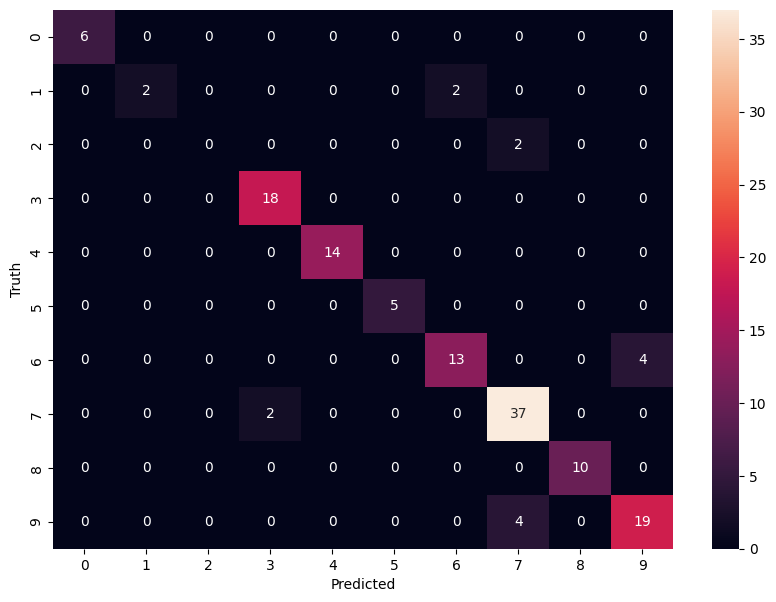

In [111]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [112]:
class_dict

{'D:\\College\\Project\\sports\\dataset\\croppedbenzema': 0,
 'D:\\College\\Project\\sports\\dataset\\croppedhalland': 1,
 'D:\\College\\Project\\sports\\dataset\\croppedkross': 2,
 'D:\\College\\Project\\sports\\dataset\\croppedmbappe': 3,
 'D:\\College\\Project\\sports\\dataset\\croppedmessi': 4,
 'D:\\College\\Project\\sports\\dataset\\croppedmodric': 5,
 'D:\\College\\Project\\sports\\dataset\\croppedneymar': 6,
 'D:\\College\\Project\\sports\\dataset\\croppedronaldo': 7,
 'D:\\College\\Project\\sports\\dataset\\croppedsalah': 8,
 'D:\\College\\Project\\sports\\dataset\\croppedzlatan': 9}

In [113]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 


[notice] A new release of pip available: 22.2.2 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


['saved_model.pkl']

In [114]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))